# Twitter Messages Data Analysis
Code link: https://github.com/hennypurwadi/twitter_analysis

### Collect Tweets from particular geocode location in Google map
https://tinyurl.com/nh26dkkn

# 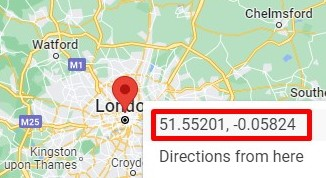

In [ ]:
!pip3 install snscrape
!pip install tweepy
!pip install wordcloud

In [ ]:
import csv
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import string
import snscrape.modules.twitter as sntwitter
import tweepy
import unicodedata
import random
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
import warning
warnings.filterwarnings('ignore')

### Collect Tweets Without Twitter Developer Account /API: with snscrape

In [2]:
#Create and append to csv file and then write tweets into csv file
tweet_data = open('London_tweets_sns.csv', 'a', newline='', encoding='utf8')
csv.writer(tweet_data).writerow(['username','tweet','hashtags']) 

#Radius around 30 km around particular geocode
max_tweets = 100
for n,tweet in enumerate(sntwitter.TwitterSearchScraper('geocode:51.55201,-0.05824,100km \
        + since:2022-07-13 until:2022-07-14 lang:en -filter:links -filter:replies').get_items()):
    
    if n > max_tweets:
        break
    csv.writer(tweet_data).writerow([tweet.user.username, tweet.content, tweet.hashtags])      
tweet_data.close()

In [3]:
df_sns = pd.read_csv('London_tweets_sns.csv')
df_sns = df_sns.dropna(subset = ['hashtags']) #Only use tweets which contained hashtags
df_sns.head()

,username,tweet,hashtags
2,iamfrannybot,Peace cannot be kept by force; it can only be ...,['PeaceDay']
3,GiadaPeaceBot,I still believe that peace and plenty and happ...,"['PeaceDay', 'RobotsForPeace']"
6,glamvicar,Been a really tough week (again). But the love...,"['cricket', 'thelifethatremains']"
10,ska_tonic,#NowPlaying Neville and Sugary Staple - Ska to...,"['NowPlaying', 'TonicSkaRadio']"
19,anagho_emanu,I keep saying it. Best music talent out of 237...,['starters']


### Collect Tweets With Twitter Developer Account API: with tweepy

### Twitter Developer API
We can apply for "Elevated" for free, from default "Essential" developer.

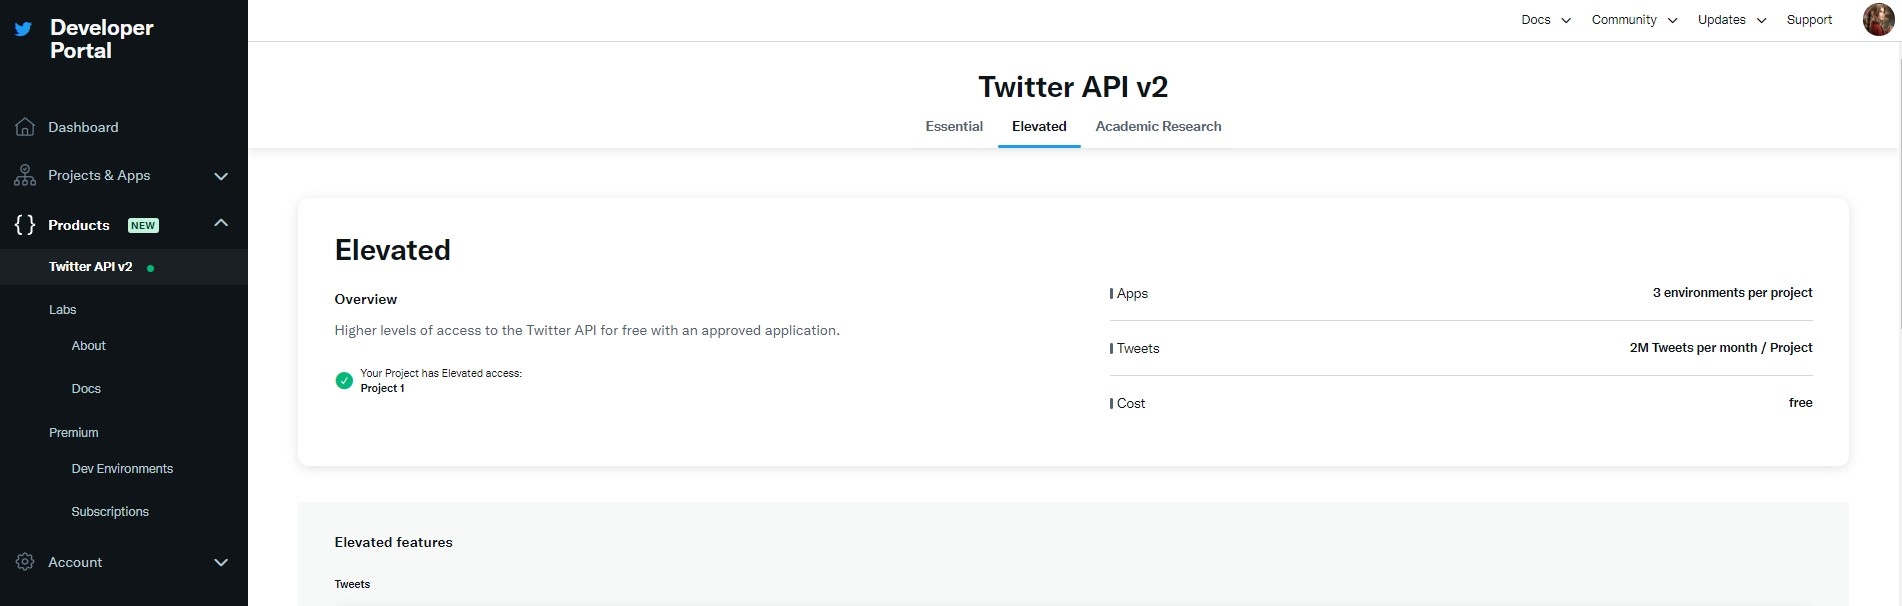

In [4]:
#https://developer.twitter.com/en/portal/dashboard

API_KEY = 'JYW7WsKbVLqOnhJZd4Kqfwtfk'
API_SECRET = 'sPAUmw4DQhnb4aGmZD1B8On7Z8SJzegycAfQEM9wGL3GFwx4ni'
ACCESS_TOKEN = '900524114976296960-vBIQ0CoAWvP4kfSctnB3ejV5bJpNMqw'
ACCESS_TOKEN_SECRET = 'egd1tOSY0LYKB1fxjPTBCvPPtYMIhJmlAI6HZ7Z09Zv7j'

a = tweepy.OAuthHandler(API_KEY, API_SECRET)
a.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
API = tweepy.API(a)

In [5]:
csvFile = open("london_tweets_tweepy.csv", "a+",newline="", encoding = "utf-8")
csvWriter = csv.writer(csvFile)
l = [] #location
u = [] #username
t = [] #tweet text
h = [] #hashtags

max_tweets = 100
n = 0  
for tweet in (API.search_tweets('geocode:51.55201,-0.05824,100km', lang='en', count=100, \
                    since_id="2022-07-13", until='2022-07-14')):
    #print(tweet.created_at, tweet.id, tweet.user.name,tweet.text)
    l.append(tweet.user.location)
    u.append(tweet.user.name)
    t.append(tweet.text.encode("utf-8"))
    h.append(tweet.entities['hashtags'])    
    n += 1  
    
    if n > max_tweets:
        break
          
    tweets=[tweet.created_at, tweet.id,tweet.user.location,tweet.user.name,
            tweet.text.encode("utf-8"),tweet.entities['hashtags']]
    csvWriter.writerow(tweets)

dictTweets = {"location":l,"username":u,"tweet":t, "hashtags": h}

csvFile.close()

In [6]:
df = pd.read_csv('London_tweets_tweepy.csv')
df = pd.DataFrame(dictTweets, columns=["location","username","tweet","hashtags"])
df.head(20)

,location,username,tweet,hashtags
0,London,RENÉ,b'I really wanna hear Pusha T and Griselda',[]
1,"London, England",Blast Indie Radio,b'14-07-2022 00:58:31 https://t.co/CSk40D02Wl ...,"[{'text': 'BlastIndieRadio', 'indices': [44, 6..."
2,England,Jacob,"b""I won 6 trophies in Assassin's Creed: Brothe...","[{'text': 'TrueTrophies', 'indices': [68, 81]}]"
3,"London, England",Emma Bridget Byrne,b'Not averse to this new \xe2\x80\x98no phone\...,[]
4,Wokingham Berkshire UK,Wokingham Weather,b'Temp: 18.0\xef\xbf\xbdC. Humidity 54% Rain t...,[]
5,London,A B,"b'@mxnciteh Realistically, I didn\xe2\x80\x99t...",[]
6,"England, United Kingdom",The ZSP,"b""@r_chuf Nahh, don't doubt yourself! I can't ...",[]
7,"London, England",Franny The Peace Bot,b'Peace cannot be kept by force; it can only b...,"[{'text': 'PeaceDay', 'indices': [90, 99]}]"
8,"London, England",PeaceBot,b'I still believe that peace and plenty and ha...,"[{'text': 'PeaceDay', 'indices': [113, 122]}, ..."
9,London,Mahmud El Sayed,"b'@lavietidhar Meanwhile, Brexit Don sweats pr...",[]


In [7]:
len(df)

100

### Remove emojis from username
Can't clean username like make Capital letter become lowercase etc, since Capital letter etc is unique part of the name.

Only remove emojis from username.

In [8]:
emoji_pattern = re.compile("["
                        "\U0001F600-\U0001F64F"  # emoticons
                        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        "\U0001F300-\U0001F5FF"  # pictographs, symbols 
                        "\U0001F700-\U0001F77F"  # alchemical symbols
                        "\U0001F680-\U0001F6FF"  # transport & map symbols
                        "\U0001FA00-\U0001FA6F"  # Chess Symbols
                        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                        "\U00002702-\U000027B0"  # Dingbats
                        "\U0001F1E0-\U0001F1FF"  # flags (iOS)   
                        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs                        
                        "\U000024C2-\U0001F251" 
                        "]+", flags=re.UNICODE)  

def delete_emoji(string):
    return emoji_pattern.sub(r'', string)

df['username_no_emoji'] = df['username'].apply(delete_emoji)
df[['username','username_no_emoji']].head(17)

,username,username_no_emoji
0,RENÉ,RENÉ
1,Blast Indie Radio,Blast Indie Radio
2,Jacob,Jacob
3,Emma Bridget Byrne,Emma Bridget Byrne
4,Wokingham Weather,Wokingham Weather
5,A B,A B
6,The ZSP,The ZSP
7,Franny The Peace Bot,Franny The Peace Bot
8,PeaceBot,PeaceBot
9,Mahmud El Sayed,Mahmud El Sayed


## 1. Entity analysis to find 5 most active users.

In [9]:
#df['user'].unique()
userlist = df['username_no_emoji'].value_counts()
most_active_users = userlist.head(5)
most_active_users

            2
DBX         2
RENÉ        1
Justyna     1
.           1
Name: username_no_emoji, dtype: int64

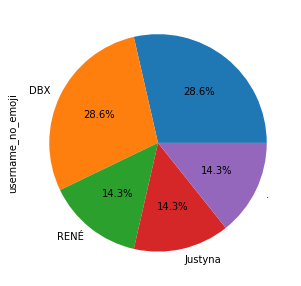

In [10]:
plot_users=most_active_users.plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.rc('axes', unicode_minus=False)
plt.savefig("MostActiveUser_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

## 2. Entity analysis to find 5 most used hastags

### Lite Cleaning for hashtags
Cleaning hashtags to get 5 most prevalent ones is lite cleaning

In [11]:
#Functun to convert to str
def lightclean(hashtags_data):  
    hashtags_data = str(hashtags_data).lower() #make str
    return hashtags_data

df['Cleaned_Hashtags'] = df['hashtags'].apply(lightclean)

htag_Texts_Cleaned=df['Cleaned_Hashtags'].values
htag_Texts_Cleaned=str(htag_Texts_Cleaned)
htag_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',htag_Texts_Cleaned)
htag_Texts_Cleaned= re.sub(r' +', ' ', htag_Texts_Cleaned)
htag_Texts_Cleaned= re.sub(r' text', ' ', htag_Texts_Cleaned) #remove 'text'
print("Cleaned hashtags:" + "\n" + htag_Texts_Cleaned)

Cleaned hashtags:
  blastindieradio indices  truetrophies indices  peaceday indices  peaceday indices  robotsforpeace indices  nowplaying indices  radio indices  music indices  ely indices  princeharry indices  heardle indices  livesoon indices  invisibledisability indices  bebold indices  nowplaying indices  tonicskaradio indices 


### Counting the number of hastags

In [12]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

hashtag_count = word_count(htag_Texts_Cleaned)
print(hashtag_count)

{'blastindieradio': 1, 'indices': 16, 'truetrophies': 1, 'peaceday': 2, 'robotsforpeace': 1, 'nowplaying': 2, 'radio': 1, 'music': 1, 'ely': 1, 'princeharry': 1, 'heardle': 1, 'livesoon': 1, 'invisibledisability': 1, 'bebold': 1, 'tonicskaradio': 1}


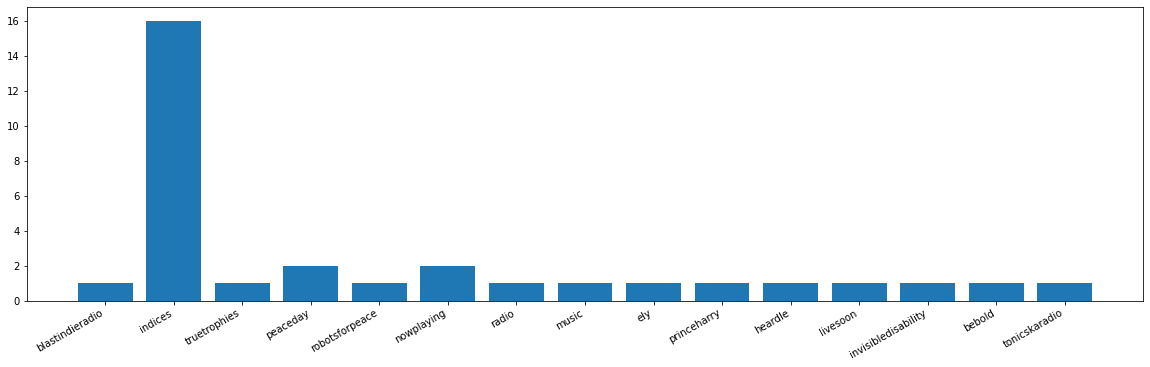

In [13]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.bar(hashtag_count.keys(), hashtag_count.values())
fig.autofmt_xdate()
plt.savefig('hashtag_count_graph.jpeg')
plt.show()

In [14]:
MostPopularHashtags = sorted(hashtag_count, key=hashtag_count.get, reverse=True)[:5]
#' '.join(MostPopularHashtags)
MostPopularHashtags

['indices', 'peaceday', 'nowplaying', 'blastindieradio', 'truetrophies']

In [15]:
#Convert list to str

MostPopularHashtags_str = ''
i = 0
for x in MostPopularHashtags:
    i = i+1
    if i < 5:
        MostPopularHashtags_str += '#'+ x + ', '
    else:
        MostPopularHashtags_str += '#'+ x
    
print("5 Most popular hastags are : " + MostPopularHashtags_str)

5 Most popular hastags are : #indices, #peaceday, #nowplaying, #blastindieradio, #truetrophies


In [16]:
TopPopularHashtags = sorted(hashtag_count, key=hashtag_count.get, reverse=True)[:1]
TopPopularHashtags_str = ' '.join(str(e) for e in TopPopularHashtags) #convert list to str
TopPopularHashtags_str
print("Top popular hastags is : " + TopPopularHashtags_str)

Top popular hastags is : indices


## 3. Entity analysis to extract five most prevalent topics in the tweets

### Preprocessing, Cleaning with regex
Make the text lowercase, remove line breaks, punctuation, usernames, url, extra spaces, etc

In [212]:
def cleaning(tweets_data):   
    tweets_data = str(tweets_data).lower() #Make the text lowercase.
    tweets_data=re.sub(r'@[A-Za-z0–9]+', '',tweets_data) #remove usernames    
    tweets_data=re.sub(r'@\w+', ' ', tweets_data) #remove usernames
    tweets_data= re.sub(r'\b\w{1,2}\b', '', tweets_data) #remove stopwords
    #tweets_data = re.sub(r'@[A-Za-z0–9]+', '', tweets_data) #remove usernames
    tweets_data = re.sub('\n', '', tweets_data) #Remove line breaks.
    tweets_data = re.sub('[%s]' % re.escape(string.punctuation), '', tweets_data) #remove punctuation
    tweets_data = re.sub('\[.*?\]', '', tweets_data)
    tweets_data=re.sub(r'http\S+', ' ', tweets_data) #remove all Url
    tweets_data = re.sub(r'https?:\/\/.*[\r\n]*', '', tweets_data) #remove website
    tweets_data = re.sub('https?://\S+|www\.\S+', '', tweets_data)  #remove all websites 
    tweets_data = re.sub(r' +', ' ', tweets_data) #remove extra space
    tweets_data = re.sub('<.*?>+', '', tweets_data)    
    tweets_data = re.sub('\w*\d\w*', '', tweets_data)
    tweets_data = re.sub(r'^RT[\s]+', '', tweets_data)    
    tweets_data = re.sub(r'[^a-z A-Z]', ' ',tweets_data) #Remove all not characters
    tweets_data = re.sub(emoji_pattern, '', tweets_data)#remove emojis
    tweets_data = re.sub(r'#', '', tweets_data) #remove hashtags     
    return tweets_data

df['clean1_tweet'] = df['tweet'].apply(cleaning)
df_cleaned_tweets=df[['tweet','clean1_tweet']]
df_cleaned_tweets.head(20)

,tweet,clean1_tweet
0,b'I really wanna hear Pusha T and Griselda',really wanna hear pusha and griselda
1,b'14-07-2022 00:58:31 https://t.co/CSk40D02Wl ...,blastindieradio michaela juaire sing louder
2,"b""I won 6 trophies in Assassin's Creed: Brothe...",won trophies assassin creed brotherhood for ...
3,b'Not averse to this new \xe2\x80\x98no phone\...,not averse this new phase dylan
4,b'Temp: 18.0\xef\xbf\xbdC. Humidity 54% Rain t...,temp xefxbfxbdc humidity rain today barometer ...
5,"b'@mxnciteh Realistically, I didn\xe2\x80\x99t...",realistically care lowkey wanted her see she...
6,"b""@r_chuf Nahh, don't doubt yourself! I can't ...",chuf nahh don doubt yourself can get dominatio...
7,b'Peace cannot be kept by force; it can only b...,peace cannot kept force can only achieved unde...
8,b'I still believe that peace and plenty and ha...,still believe that peace and plenty and happi...
9,"b'@lavietidhar Meanwhile, Brexit Don sweats pr...",meanwhile brexit don sweats profusely


### Remove stopwords with nltk

In [213]:
stopwords = nltk.corpus.stopwords.words('english') 
df['clean2_tweet'] = df['clean1_tweet'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stopwords))

df_cleaned_tweets=df[['tweet','clean2_tweet']]
df_cleaned_tweets.head(3)

,tweet,clean2_tweet
0,b'I really wanna hear Pusha T and Griselda',really wanna hear pusha griselda
1,b'14-07-2022 00:58:31 https://t.co/CSk40D02Wl ...,blastindieradio michaela juaire sing louder
2,"b""I won 6 trophies in Assassin's Creed: Brothe...",trophies assassin creed brotherhood points tru...


### Stemming with nltk

In [214]:
stm = PorterStemmer()
df['clean3_tweet'] = df['clean2_tweet'].apply(
    lambda x: " ".join([stm.stem(word) for word in x.split()]))

df_cleaned_tweets=df[['tweet','clean3_tweet']]
df_cleaned_tweets.head()

,tweet,clean3_tweet
0,b'I really wanna hear Pusha T and Griselda',realli wanna hear pusha griselda
1,b'14-07-2022 00:58:31 https://t.co/CSk40D02Wl ...,blastindieradio michaela juair sing louder
2,"b""I won 6 trophies in Assassin's Creed: Brothe...",trophi assassin creed brotherhood point truetr...
3,b'Not averse to this new \xe2\x80\x98no phone\...,avers new phase dylan
4,b'Temp: 18.0\xef\xbf\xbdC. Humidity 54% Rain t...,temp xefxbfxbdc humid rain today baromet hpa r...


### Lemitization with nltk

In [215]:
##lemmatization to bring the words in their root form  
lem = WordNetLemmatizer()
df['cleaned_tweet'] = df['clean3_tweet'].apply(
    lambda x: " ".join([lem.lemmatize(word) for word in x.split()]))
df_cleaned_tweets=df[['tweet','cleaned_tweet']]
df_cleaned_tweets.head()

,tweet,cleaned_tweet
0,b'I really wanna hear Pusha T and Griselda',realli wanna hear pusha griselda
1,b'14-07-2022 00:58:31 https://t.co/CSk40D02Wl ...,blastindieradio michaela juair sing louder
2,"b""I won 6 trophies in Assassin's Creed: Brothe...",trophi assassin creed brotherhood point truetr...
3,b'Not averse to this new \xe2\x80\x98no phone\...,avers new phase dylan
4,b'Temp: 18.0\xef\xbf\xbdC. Humidity 54% Rain t...,temp xefxbfxbdc humid rain today baromet hpa r...


### Comparison before cleaning vs after cleaned

In [216]:
df['tweet'].loc[1] #Before cleaning

b'14-07-2022 00:58:31 https://t.co/CSk40D02Wl #BlastIndieRadio \xf0\x9f\x94\x8a Michaela Juaire - Sing Louder'

In [217]:
df['cleaned_tweet'].loc[1] #After cleaned

'blastindieradio michaela juair sing louder'

### Vectorize cleaned tweets with CountVectorizer
     

In [218]:
countv = CountVectorizer(min_df=1,max_df=0.9,stop_words='english')
countv_tweet = countv.fit_transform(df['cleaned_tweet'])
countv_tweet

<100x412 sparse matrix of type '<class 'numpy.int64'>'
	with 487 stored elements in Compressed Sparse Row format>

In [219]:
countv_tweet.shape

(100, 412)

### Vectorize cleaned tweets with Tf-IDF

In [220]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=1, stop_words='english')
tfidf_tweet = tfidf.fit_transform(df['cleaned_tweet'])
tfidf_tweet

<100x412 sparse matrix of type '<class 'numpy.float64'>'
	with 487 stored elements in Compressed Sparse Row format>

## Topic extraction with LDA (Latent Dirichlet Allocation) with Countvectorizer

In [221]:
LDA_countv = LatentDirichletAllocation(n_components=5,random_state=42)
LDA_countv.fit(countv_tweet)

LatentDirichletAllocation(n_components=5, random_state=42)

In [222]:
#len(LDA_countv.components_[0])
LDA_countv.components_

array([[0.20001669, 0.20000712, 0.20000414, ..., 0.20001149, 0.20000269,
        0.20000269],
       [0.20001999, 1.19980848, 0.2000052 , ..., 1.20091865, 0.20000322,
        0.20000322],
       [1.1999236 , 0.20000838, 0.200005  , ..., 1.19904257, 1.19998762,
        1.19998762],
       [0.2000219 , 1.20016847, 0.20000543, ..., 0.20001501, 0.20000357,
        0.20000357],
       [0.20001781, 0.20000755, 1.19998023, ..., 0.20001227, 0.2000029 ,
        0.2000029 ]])

In [223]:
eachtopic = LDA_countv.components_[0]
eachtopic.argsort()

array([291,  24, 337,  27, 141,  98, 164, 168, 350, 200, 239,  31, 298,
       114, 175, 401, 385, 282,  96, 139, 124, 410, 411, 349, 402, 360,
       382, 136,  84, 189,  62,  43, 315, 230, 100,  58, 366, 181, 299,
       397, 174,  77, 304, 222, 259, 399, 148,  83, 133, 324, 374,  42,
        36, 275, 171,  95, 206,  89, 195, 348,  61, 325, 165,  38, 391,
         9, 339, 172, 103, 365, 323, 106, 157, 226, 101,  54,  82, 131,
        81, 359, 121, 162, 179, 313,  48,  86, 352, 217, 290,  65, 211,
       115, 170,  88,   6, 316,  76, 306, 192, 183, 296, 268, 110, 178,
       392,  33, 393, 303,  94, 329,  12, 328, 367, 243, 159, 205,  72,
       105,  32,   2, 292, 342, 307, 376, 191, 173, 199, 286, 388, 310,
       219, 262, 327,  51, 314, 123, 285, 405, 338,  78,  49, 120, 309,
       235, 261, 280, 368, 273, 119, 225,  35, 245, 276, 343,  90, 295,
       357, 244, 232, 331, 311, 320, 281, 373, 149,  14,  67, 294, 107,
       126, 336, 272, 322, 238, 118, 379, 407,   3, 132, 111, 33

In [224]:
#eachtopic[183]
# Top 5 words for this topic:
eachtopic.argsort()[-5:]

array([252, 335, 223, 209, 256], dtype=int64)

In [225]:
word_top = eachtopic.argsort()[-5:]
for index in word_top:
    print(countv.get_feature_names()[index])

pay
start
mph
mean
peopl


In [226]:
for index,topic in enumerate(LDA_countv.components_):
    print(f'Most prevalent topic #{index}'+ ': ')
    print([countv.get_feature_names()[i] for i in topic.argsort()[-1:]])

Most prevalent topic #0: 
['peopl']
Most prevalent topic #1: 
['messag']
Most prevalent topic #2: 
['realli']
Most prevalent topic #3: 
['love']
Most prevalent topic #4: 
['like']


In [227]:
topic_lda_cv = LDA_countv.transform(countv_tweet)
topic_lda_cv[0].argmax()
topic_lda_cv.argmax(axis=1)
df['Topic_lda_cv'] = topic_lda_cv.argmax(axis=1)
df[['tweet','cleaned_tweet','Topic_lda_cv']].head(10)

,tweet,cleaned_tweet,Topic_lda_cv
0,b'I really wanna hear Pusha T and Griselda',realli wanna hear pusha griselda,2
1,b'14-07-2022 00:58:31 https://t.co/CSk40D02Wl ...,blastindieradio michaela juair sing louder,2
2,"b""I won 6 trophies in Assassin's Creed: Brothe...",trophi assassin creed brotherhood point truetr...,4
3,b'Not averse to this new \xe2\x80\x98no phone\...,avers new phase dylan,3
4,b'Temp: 18.0\xef\xbf\xbdC. Humidity 54% Rain t...,temp xefxbfxbdc humid rain today baromet hpa r...,0
5,"b'@mxnciteh Realistically, I didn\xe2\x80\x99t...",realist care lowkey want see knew feel anymor ...,4
6,"b""@r_chuf Nahh, don't doubt yourself! I can't ...",chuf nahh doubt get domin life fact got like i...,1
7,b'Peace cannot be kept by force; it can only b...,peac cannot kept forc achiev understand albert...,1
8,b'I still believe that peace and plenty and ha...,still believ peac plenti happi work way fool k...,3
9,"b'@lavietidhar Meanwhile, Brexit Don sweats pr...",meanwhil brexit sweat profus,4


## Topic extraction with LDA (Latent Dirichlet Allocation) with Tf-IDF

In [228]:
LDA_tfidf = LatentDirichletAllocation(n_components=5,random_state=42)
LDA_tfidf.fit(tfidf_tweet)

LatentDirichletAllocation(n_components=5, random_state=42)

In [229]:
LDA_tfidf.components_

array([[0.20002844, 0.20003699, 0.20001882, ..., 0.20004136, 0.20001669,
        0.20001669],
       [0.20003054, 0.54270395, 0.20002121, ..., 0.5340069 , 0.50586269,
        0.50586269],
       [0.90698446, 0.20004199, 0.20002231, ..., 0.67842643, 0.20001976,
        0.20001976],
       [0.20003374, 0.53865386, 0.20002234, ..., 0.20004875, 0.2000204 ,
        0.2000204 ],
       [0.2000296 , 0.20003748, 0.56697156, ..., 0.20004303, 0.20001737,
        0.20001737]])

In [230]:
eachtopics = LDA_tfidf.components_[0]
eachtopics.argsort()

array([223, 291, 361, 374,  48, 353,  29, 277, 396, 321, 137, 297, 404,
       154, 398, 152,  77, 299,  58, 100, 181, 397, 366, 174, 222, 324,
       304, 399, 133, 259,  83, 148, 141, 200, 337, 164, 239,  98, 168,
        27, 350,  24, 308, 124,  96, 139, 410, 282, 411, 349, 360, 402,
       359, 179, 162, 121, 313, 316, 192, 306, 268, 183,  76, 296, 136,
        84, 189, 315, 230, 382,  43,  62, 106,  95, 206,  42, 275, 171,
        36, 172, 103, 323,   9, 339, 391, 365, 325, 348,  89, 195,  38,
        61, 165, 405, 123, 285,  51, 314, 338, 281, 311, 331, 373, 320,
       343, 245,  35, 225,  90, 276,  97,  86, 217, 211, 352, 290,  65,
       393, 110,  33, 392, 178, 173, 388, 191, 286, 199,  88, 170, 115,
         6, 226, 101, 131,  81,  82,  54, 157,   2, 307, 342, 292, 376,
       159, 243, 205,  32, 105,  72, 232, 295, 357, 244, 330, 231, 111,
       235,  78,  49, 309, 120, 379,   3, 407, 132, 119, 273, 280, 261,
       368, 274, 144, 135, 387, 336, 126, 272,  37, 215, 317, 19

In [231]:
#eachtopics[183]
# Top 5 words for this topic:
eachtopics.argsort()[-5:]

array([237, 160, 403, 229, 305], dtype=int64)

In [232]:
for index,topic in enumerate(LDA_tfidf.components_):
    print(f'Most prevalent topic #{index}'+ ': ')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-1:]]) 

Most prevalent topic #0: 
['second']
Most prevalent topic #1: 
['fantast']
Most prevalent topic #2: 
['incred']
Most prevalent topic #3: 
['livesoon']
Most prevalent topic #4: 
['feel']


In [233]:
topic_lda_tfidf = LDA_tfidf.transform(tfidf_tweet)
topic_lda_tfidf.shape
topic_lda_tfidf[0].round(2)
topic_lda_tfidf[0].argmax()
topic_lda_tfidf.argmax(axis=1)

array([2, 2, 4, 3, 3, 1, 1, 1, 0, 4, 2, 2, 1, 2, 2, 0, 1, 0, 0, 4, 4, 0,
       4, 3, 3, 4, 3, 2, 4, 2, 4, 4, 0, 3, 0, 4, 0, 0, 0, 2, 3, 0, 3, 1,
       2, 3, 1, 3, 4, 2, 4, 1, 2, 2, 0, 1, 4, 0, 1, 0, 0, 0, 4, 2, 4, 0,
       0, 1, 2, 4, 3, 0, 0, 3, 2, 0, 0, 0, 1, 0, 4, 4, 1, 3, 4, 4, 0, 4,
       4, 0, 1, 3, 0, 1, 1, 3, 1, 0, 2, 4], dtype=int64)

In [234]:
df['Topic_lda_tfif'] = topic_lda_tfidf.argmax(axis=1)
df[['tweet','cleaned_tweet','Topic_lda_tfif']].head(10)

,tweet,cleaned_tweet,Topic_lda_tfif
0,b'I really wanna hear Pusha T and Griselda',realli wanna hear pusha griselda,2
1,b'14-07-2022 00:58:31 https://t.co/CSk40D02Wl ...,blastindieradio michaela juair sing louder,2
2,"b""I won 6 trophies in Assassin's Creed: Brothe...",trophi assassin creed brotherhood point truetr...,4
3,b'Not averse to this new \xe2\x80\x98no phone\...,avers new phase dylan,3
4,b'Temp: 18.0\xef\xbf\xbdC. Humidity 54% Rain t...,temp xefxbfxbdc humid rain today baromet hpa r...,3
5,"b'@mxnciteh Realistically, I didn\xe2\x80\x99t...",realist care lowkey want see knew feel anymor ...,1
6,"b""@r_chuf Nahh, don't doubt yourself! I can't ...",chuf nahh doubt get domin life fact got like i...,1
7,b'Peace cannot be kept by force; it can only b...,peac cannot kept forc achiev understand albert...,1
8,b'I still believe that peace and plenty and ha...,still believ peac plenti happi work way fool k...,0
9,"b'@lavietidhar Meanwhile, Brexit Don sweats pr...",meanwhil brexit sweat profus,4


## Topic extraction with NMF (Non-Negative Matric Factorization) with Countvectorizer

In [235]:
nmf_model_cv = NMF(n_components = 5, random_state=42)
nmf_model_cv.fit(countv_tweet)

C:\Users\HENNY\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=5, random_state=42)

In [236]:
for index,topic in enumerate(nmf_model_cv.components_):
    print(f'Most prevalent topic #{index}'+ ': ')
    print([countv.get_feature_names()[i] for i in topic.argsort()[-1:]])   

Most prevalent topic #0: 
['like']
Most prevalent topic #1: 
['mph']
Most prevalent topic #2: 
['think']
Most prevalent topic #3: 
['peac']
Most prevalent topic #4: 
['love']


In [237]:
topic_nmf_cv = nmf_model_cv.transform(countv_tweet)
topic_nmf_cv.argmax(axis=1)

array([4, 3, 0, 0, 1, 3, 0, 3, 3, 0, 4, 0, 3, 3, 4, 0, 2, 3, 0, 3, 3, 2,
       3, 0, 3, 0, 4, 0, 4, 0, 0, 0, 4, 0, 2, 3, 0, 3, 0, 4, 3, 2, 0, 0,
       0, 3, 0, 0, 0, 0, 4, 2, 0, 3, 0, 0, 0, 0, 3, 2, 3, 3, 2, 0, 0, 1,
       0, 2, 0, 3, 4, 3, 0, 4, 3, 0, 3, 0, 3, 3, 0, 2, 3, 0, 0, 2, 3, 3,
       4, 2, 3, 0, 3, 0, 3, 1, 0, 0, 3, 0], dtype=int64)

In [238]:
df['Topic_nmf_cv'] = topic_nmf_cv.argmax(axis=1)
df[['tweet','cleaned_tweet','Topic_nmf_cv']].head(10)

,tweet,cleaned_tweet,Topic_nmf_cv
0,b'I really wanna hear Pusha T and Griselda',realli wanna hear pusha griselda,4
1,b'14-07-2022 00:58:31 https://t.co/CSk40D02Wl ...,blastindieradio michaela juair sing louder,3
2,"b""I won 6 trophies in Assassin's Creed: Brothe...",trophi assassin creed brotherhood point truetr...,0
3,b'Not averse to this new \xe2\x80\x98no phone\...,avers new phase dylan,0
4,b'Temp: 18.0\xef\xbf\xbdC. Humidity 54% Rain t...,temp xefxbfxbdc humid rain today baromet hpa r...,1
5,"b'@mxnciteh Realistically, I didn\xe2\x80\x99t...",realist care lowkey want see knew feel anymor ...,3
6,"b""@r_chuf Nahh, don't doubt yourself! I can't ...",chuf nahh doubt get domin life fact got like i...,0
7,b'Peace cannot be kept by force; it can only b...,peac cannot kept forc achiev understand albert...,3
8,b'I still believe that peace and plenty and ha...,still believ peac plenti happi work way fool k...,3
9,"b'@lavietidhar Meanwhile, Brexit Don sweats pr...",meanwhil brexit sweat profus,0


## Topic extraction with NMF (Non-Negative Matric Factorization) with Tf-IDF

In [239]:
nmf_model_tfidf= NMF(n_components = 5, random_state=42)
nmf_model_tfidf.fit(countv_tweet)

C:\Users\HENNY\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=5, random_state=42)

In [240]:
for index,topic in enumerate(nmf_model_tfidf.components_):
    print(f'Most prevalent topic #{index}'+ ': ')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-1:]])        

Most prevalent topic #0: 
['like']
Most prevalent topic #1: 
['mph']
Most prevalent topic #2: 
['think']
Most prevalent topic #3: 
['peac']
Most prevalent topic #4: 
['love']


In [241]:
topic_nmf_tfidf = nmf_model_tfidf.transform(tfidf_tweet)
topic_nmf_tfidf.argmax(axis=1)
df['Topics_nmf_tfidf'] = topic_nmf_tfidf.argmax(axis=1)
df[['tweet','cleaned_tweet','Topics_nmf_tfidf']].head(10)

,tweet,cleaned_tweet,Topics_nmf_tfidf
0,b'I really wanna hear Pusha T and Griselda',realli wanna hear pusha griselda,4
1,b'14-07-2022 00:58:31 https://t.co/CSk40D02Wl ...,blastindieradio michaela juair sing louder,3
2,"b""I won 6 trophies in Assassin's Creed: Brothe...",trophi assassin creed brotherhood point truetr...,0
3,b'Not averse to this new \xe2\x80\x98no phone\...,avers new phase dylan,0
4,b'Temp: 18.0\xef\xbf\xbdC. Humidity 54% Rain t...,temp xefxbfxbdc humid rain today baromet hpa r...,1
5,"b'@mxnciteh Realistically, I didn\xe2\x80\x99t...",realist care lowkey want see knew feel anymor ...,3
6,"b""@r_chuf Nahh, don't doubt yourself! I can't ...",chuf nahh doubt get domin life fact got like i...,0
7,b'Peace cannot be kept by force; it can only b...,peac cannot kept forc achiev understand albert...,3
8,b'I still believe that peace and plenty and ha...,still believ peac plenti happi work way fool k...,3
9,"b'@lavietidhar Meanwhile, Brexit Don sweats pr...",meanwhil brexit sweat profus,0
